In [501]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [502]:
import numpy as np

def f(x, y):
    """Objective function"""
    return -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    
# Compute and plot the function in 3D within [-10, 10]x[-10, 10]
x, y = np.array(np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Hyper-parameter of the algorithm
c1 = c2 = 0.5
w = 0.5

def update(V, X, pbest, pbest_obj, gbest, gbest_obj, positions, costs, w=0.5, c1=0.5, c2=0.5):
    """Function to do one iteration of particle swarm optimization"""
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    X = np.clip(X, -512, 512)
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.minimum(pbest_obj, obj)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
    positions.append(X.T.copy())
    costs.append(pbest_obj)
    return V, X, pbest, pbest_obj, gbest, gbest_obj, positions, costs

In [503]:

num_iterations = 200
positions = []
costs= []
# Create particles
n_particles = 500
random_seed = int(time.time())
np.random.seed(random_seed)
# Draw between -500 and 500 
X = np.random.uniform(-512, 512, (10, n_particles))
V = np.random.randn(10, n_particles) * 100

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
for i in range(num_iterations):
    V, X, pbest, pbest_obj, gbest, gbest_obj, positions, costs = update(V, X, pbest, pbest_obj, gbest, gbest_obj, positions, costs)

# print(np.array(positions).shape)
costs_reshape = np.array(costs).reshape(200, 500, 1)
combined_array = np.concatenate((np.array(positions), costs_reshape), axis=2)





c:\Users\rohan\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(
No handles with labels found to put in legend.


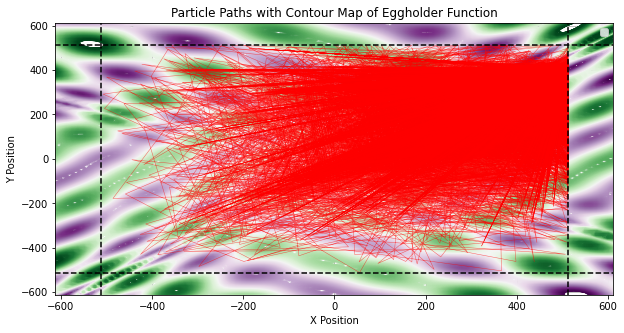

In [504]:
def hand_plot_and_save(particle_data, limits, savepath):    
    initial_positions = particle_data[0, :, :2]
    final_positions = particle_data[-1, :, :2]

    # Create a meshgrid for the contour plot
    eggholderfunction = lambda x,y: -(y + 47) * np.sin(np.sqrt(np.abs(x/2 + (y + 47)))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    spherical = lambda x,y: x**2 + y**2
    x_range = np.linspace(limits[0][0]  -100 , limits[0][1]  +100 , 100)
    y_range = np.linspace(limits[1][0]  -100 , limits[1][1]  +100 , 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = eggholderfunction(X, Y)
    

    # Plot initial and final positions of particles
    plt.figure(figsize=(10, 5))


    # Plot the contour map
    plt.contour(X,Y,Z,np.linspace(-1000, 1000, 2000),cmap='PRGn', alpha=0.3)
    # plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)

    # Plot paths of each particle
    for particle in particle_data[:, :, :2]:
        plt.plot(particle[:, 0], particle[:, 1], color='red', linewidth=0.5, alpha=0.6)

    plt.xlim([limits[0][0] - 100, limits[0][1] + 100])
    plt.ylim([limits[1][0] - 100, limits[1][1] + 100])
    # plt.scatter(initial_positions[:, 0], initial_positions[:, 1], color='blue', label='Initial Position')
    # plt.scatter(final_positions[:, 0], final_positions[:, 1], color='green', label='Final Position')
    # plt.scatter([512], [404.2], color='black', marker='o', label='')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Particle Paths with Contour Map of Eggholder Function')
    plt.axvline(x=-512, color='black', linestyle='--')
    plt.axvline(x=512, color='black', linestyle='--', )
    plt.axhline(y=-512, color='black', linestyle='--')
    plt.axhline(y=512, color='black', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.savefig(savepath)
    # Save the figure with filename "bepis.png" in the same directory
    # plt.show()
    
particle_data = combined_array
limits = [[-512, 512], [-512, 512]]
hand_plot_and_save(particle_data, limits, 'byhandtest.png')

In [505]:
particle_exploded = particle_data.reshape(100000, 3)
# Print the minimal cost from the particle_data array, where cost is the last column on the last dimension

lowest_cost_index = np.argmin(particle_exploded[:, 2])
lowest_cost_row = particle_exploded[lowest_cost_index]
print('Lowest Cost: {:.3f}'.format(lowest_cost_row[2]))


# Print the lowest cost position
print('Lowest Cost Position: ({:.3f}, {:.3f})'.format(lowest_cost_row[0], lowest_cost_row[1]))

rows_with_x_512 = particle_exploded[particle_exploded[:, 0] == 512]

# Print the rows with x-coordinate equal to 512
print("Rows with x-coordinate equal to 512:")
print(rows_with_x_512)


Lowest Cost: -959.641
Lowest Cost Position: (512.000, 404.232)
Rows with x-coordinate equal to 512:
[[ 512.          400.80941491 -946.66626241]
 [ 512.           91.60972081 -351.35253904]
 [ 512.         -109.40435037   32.61116   ]
 ...
 [ 512.          404.23180527 -959.64066272]
 [ 512.          404.23180527 -959.64066272]
 [ 512.          404.23180527 -959.64066272]]


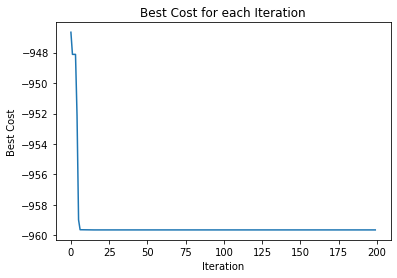

In [506]:
#Plot cost function, the last dimension of particle_data, to give a 1000 x 20 x 1 array
#Plot the best cost function value for each iteration, to give a 1000 x 1 array

cost = particle_data[:, :, -1]
# Convert the 1000 x 20 cost array into a 1000 x 1 array, where the value is the best cost for each iteration
best_cost = np.min(cost, axis=1)
# Plot
plt.plot(best_cost)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.title('Best Cost for each Iteration')
plt.show()




PSO found best solution at f([512.         404.23180527])=-959.640662720851
Global optimal at f([9.4994994994995, 10.0])=-62.43271053711317
[[[  30.53886208  145.3118132  -189.96122399]
  [ 328.53121512  446.73747465 -337.79076946]
  [-252.74230037  167.53742173   84.92751526]
  ...
  [ 414.53307015  403.44385698 -871.9453951 ]
  [-394.70844683 -314.51057407 -746.98672957]
  [ 177.00842423   70.43748947 -290.15076684]]

 [[  64.73848143  196.0860395  -189.96122399]
  [ 397.37910014  484.99618048 -337.79076946]
  [-182.0502296   229.67284829 -142.45729617]
  ...
  [ 401.21684852  402.83322819 -871.9453951 ]
  [-288.08222666 -223.52426657 -746.98672957]
  [ 220.74371694  110.26724022 -290.15076684]]

 [[ 126.9110646   233.87562491 -189.96122399]
  [ 427.92170706  484.9535636  -337.79076946]
  [ -63.13037319  282.13989694 -142.45729617]
  ...
  [ 434.54040236  403.58789037 -871.9453951 ]
  [-183.13290929 -146.04427034 -746.98672957]
  [ 266.44961071  155.72948483 -290.15076684]]

 ...

 [

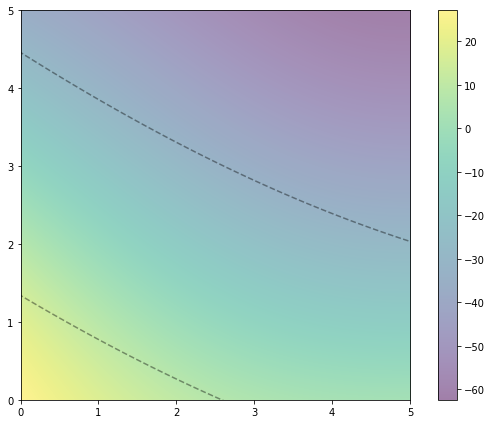

In [507]:
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
#anim.save("PSO.gif", dpi=120, writer="imagemagick")
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))
print(particle_data)
print(np.array(particle_data).shape)